In [89]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

Загрузите файл HR.csv в pandas dfframe 

Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.

Определите две самые скоррелированные и две наименее
скоррелированные переменные.

Рассчитайте сколько сотрудников работает в каждом
департаменте.

Показать распределение сотрудников по зарплатам. 

Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
  ● Доля сотрудников с повышением за последние 5 лет
  ● Средняя степень удовлетворенности
  ● Среднее количество проектов

Загрузить jupyter notebook с решение на github и прислать ссылку 


In [90]:
df = pd.read_csv('HR.csv') #Загрузка

In [91]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [92]:
df.shape #кол строк и солбцов

(14999, 10)

In [93]:
df.info() # инфо по типам и заполняемости

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [94]:
# Основные статистики для переменных
statistics = df.describe()
statistics.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [95]:
# Медиана для числовых столбцов
df.median(numeric_only=True).head(10)

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [96]:
# Мода
df.select_dtypes(include='object').mode().loc[0].head()

department    sales
salary          low
Name: 0, dtype: object

In [97]:
# Мода для числовых столбцов
df.select_dtypes(include='number').mode().loc[0].head()

satisfaction_level        0.10
last_evaluation           0.55
number_project            4.00
average_montly_hours    135.00
time_spend_company        3.00
Name: 0, dtype: float64

In [98]:
# Корреляционная матрица
corr_matrix = df.corr()
corr_matrix.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


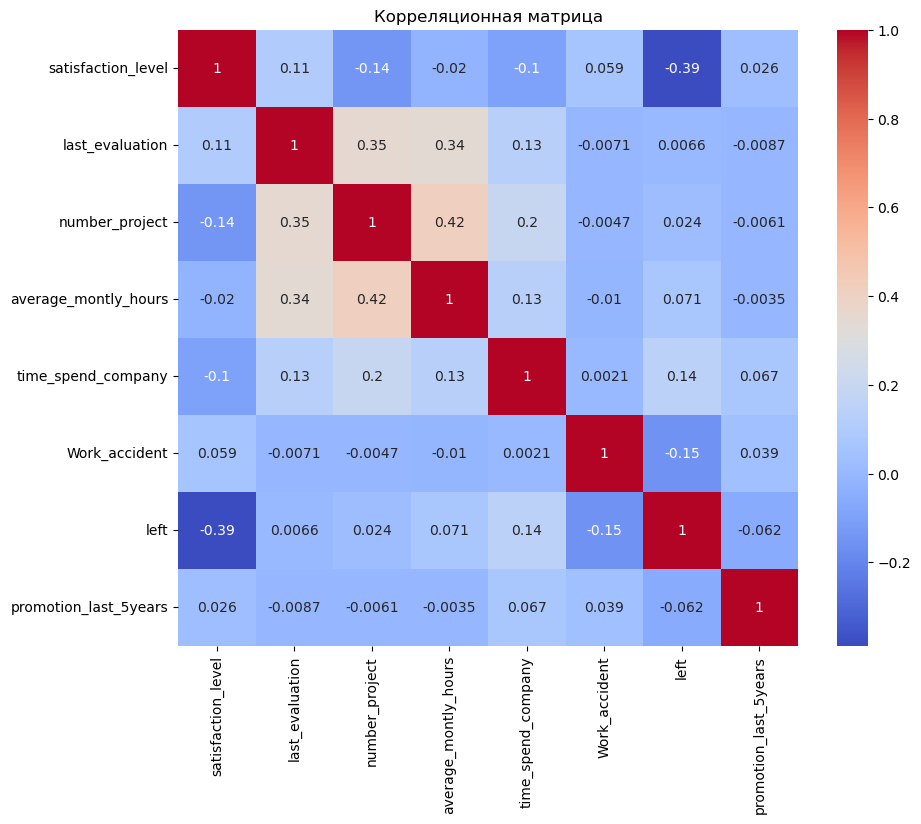

In [99]:
# Корреляционная матрица визуал
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [100]:
# Определение двух самых скоррелированных и двух наименее скоррелированных переменных
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
top_corr = corr_pairs[corr_pairs != 1.0].head(2)
bottom_corr = corr_pairs[corr_pairs != 1.0].tail(2)
print("Самые скоррелированные переменные:")
print(top_corr)
print()
print("Наименее скоррелированные переменные:")
print(bottom_corr)

Самые скоррелированные переменные:
number_project        average_montly_hours    0.417211
average_montly_hours  number_project          0.417211
dtype: float64

Наименее скоррелированные переменные:
left                satisfaction_level   -0.388375
satisfaction_level  left                 -0.388375
dtype: float64


In [101]:
# Количество сотрудников в каждом департаменте
department_count = df['department'].value_counts()
department_count.head(20)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [102]:
# Распределение сотрудников по зарплатам
salary_distribution = df['salary'].value_counts()
salary_distribution.head()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [103]:
# Распределение сотрудников по зарплатам в каждом департаменте
salary_by_department = df.groupby('department')['salary'].value_counts().sort_index(ascending=False)
salary_by_department.head(30)

department   salary
technical    medium    1147
             low       1372
             high       201
support      medium     942
             low       1146
             high       141
sales        medium    1772
             low       2099
             high       269
product_mng  medium     383
             low        451
             high        68
marketing    medium     376
             low        402
             high        80
management   medium     225
             low        180
             high       225
hr           medium     359
             low        335
             high        45
accounting   medium     335
             low        358
             high        74
RandD        medium     372
             low        364
             high        51
IT           medium     535
             low        609
             high        83
Name: salary, dtype: int64

In [104]:
# Гипотеза ,что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом
high_salary = df[df['salary'] == 'high']['average_montly_hours'] #с высоким окладом
low_salary = df[df['salary'] == 'low']['average_montly_hours'] #с низким окладом

# t-тест Уэлча
stat, p_value = ttest_ind(high_salary, low_salary, equal_var=False)

print(f"Статистика t-теста: {stat}")
print(f"p_value: {p_value}")


a = 0.05  # Уровень значимости
if p_value < a:
    print("Отклоняем нулевую гипотезу: сотрудники с высоким окладом проводят на работе статистически значимо больше времени.")
else:
    print("Не отклоняем нулевую гипотезу: нет статистически значимых различий во времени, проведённом на работе, между сотрудниками с высоким и низким окладом.")

Статистика t-теста: -0.7624331665385475
p_value: 0.4459045542257889
Не отклоняем нулевую гипотезу: нет статистически значимых различий во времени, проведённом на работе, между сотрудниками с высоким и низким окладом.


In [105]:
# Показатели среди уволившихся и не уволившихся сотрудников
left_employees = df[df['left']== 1]
not_left_employees = df[df['left']== 0]

In [106]:

# Доля сотрудников с повышением за последние 5 лет уволившихся
promotion_rate_left = (left_employees['promotion_last_5years'] == 1).sum() / len(left_employees)
print(f'Доля сотрудников с повышением среди уволившихся: {promotion_rate_left * 100:.2f}%')
# Средняя степень удовлетворенности уволившихся
avg_satisfaction_left = left_employees['satisfaction_level'].mean()
print(f'Средняя степень удовлетворенности среди уволившихся: {avg_satisfaction_left:.2f}')
# Среднее количество проектов уволившихся
avg_projects_left = left_employees['number_project'].mean()
print(f'Среднее количество проектов среди уволившихся: {avg_projects_left:.2f}')


# Доля сотрудников с повышением за последние 5 лет оставшихся
promotion_rate_not_left = (not_left_employees['promotion_last_5years'] == 1).sum() / len(not_left_employees)
print(f'\nДоля сотрудников с повышением среди оставшихся: {promotion_rate_not_left * 100:.2f}%')
# Средняя степень удовлетворенности оставшихся
avg_satisfaction_not_left = not_left_employees['satisfaction_level'].mean()
print(f'Средняя степень удовлетворенности среди оставшихся: {avg_satisfaction_not_left:.2f}')
# Среднее количество проектов оставшихся
avg_projects_not_left = not_left_employees['number_project'].mean()
print(f'Среднее количество проектов среди оставшихся: {avg_projects_not_left:.2f}')

Доля сотрудников с повышением среди уволившихся: 0.53%
Средняя степень удовлетворенности среди уволившихся: 0.44
Среднее количество проектов среди уволившихся: 3.86

Доля сотрудников с повышением среди оставшихся: 2.63%
Средняя степень удовлетворенности среди оставшихся: 0.67
Среднее количество проектов среди оставшихся: 3.79


Комментарий:

Среди уволившихся сотрудников доля тех, кто получил повышение за последние 5 лет, составляет всего 0,53%.
Среди оставшихся сотрудников эта доля много выше — 2,63%. Это может указывать на то, что получение повышения может быть одним из факторов, влияющих на решение сотрудника остаться в компании.

Средняя степень удовлетворённости среди уволившихся сотрудников составляет 0,44, что указывает на относительно низкий уровень удовлетворённости работой.
Среди оставшихся сотрудников средняя степень удовлетворённости значительно выше — 0,67. Это может говорить о том, что высокий уровень удовлетворённости является одним из факторов, способствующих тому, что сотрудники остаются в компании.

Среднее количество проектов, в которых участвовали уволившиеся сотрудники, составляет 3,86.
Для оставшихся сотрудников это значение чуть ниже — 3,79. Разница между этими значениями небольшая, что может указывать на то, что количество проектов не является определяющим фактором при принятии решения об увольнении или продолжении работы.